# ICX / USD exchange rate volatility analysis
Mitchell P. Krawiec-Thayer

### Import libraries

In [1]:
import isthmuslib as isli
from typing import Dict, List
import matplotlib.pyplot as plt
import os as os
from loguru import logger
import pandas as pd

### Import exchange rate data CSV from 2020+

Load from CSV to pandas dataframe

In [2]:
df: pd.DataFrame = pd.DataFrame()
for year in range(2019,2022):
    df = df.append(pd.read_csv(os.path.join('data',f'icx-{year}.csv')), ignore_index=True)
df['timestamp'] = [isli.machine_time(x) for x in df['Date']]

Load into a timeseries, convert dates to timestamp, and sort ascending

In [3]:
timeseries: isli.VectorSequence = isli.VectorSequence(data = df, basis_col_name='timestamp')
timeseries.data.sort_values(by='timestamp', ascending = True, ignore_index=True)

,Date,Open,High,Low,Close,timestamp
0,09/12/2019,0.2399,0.3000,0.1900,0.2054,1.568268e+09
1,09/13/2019,0.2151,0.2272,0.1985,0.1985,1.568354e+09
2,09/14/2019,0.1987,0.2278,0.1853,0.2029,1.568441e+09
3,09/15/2019,0.1996,0.2099,0.1996,0.2082,1.568527e+09
4,09/16/2019,0.2081,0.2084,0.1974,0.2056,1.568614e+09
...,...,...,...,...,...,...
836,11/26/2021,1.9808,2.0242,1.6444,1.7268,1.637910e+09
837,11/27/2021,1.7269,1.8142,1.7053,1.7545,1.637996e+09
838,11/28/2021,1.7545,1.7811,1.6000,1.7457,1.638083e+09
839,11/29/2021,1.7457,1.8113,1.7063,1.7831,1.638169e+09


### Examine the exchange rate data

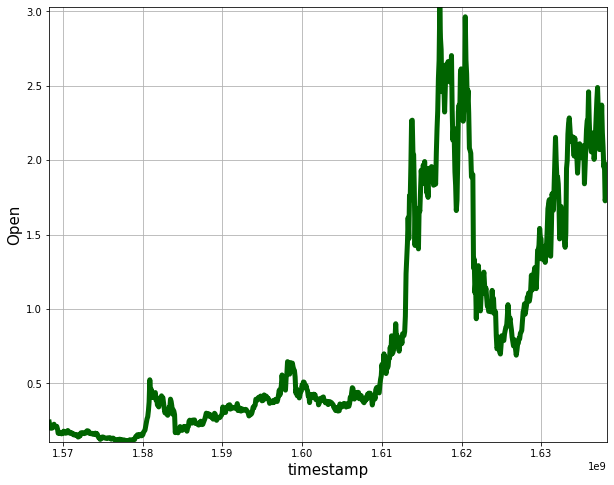

In [4]:
timeseries.plot('Open');

### Define a function for sliding window analysis

In [5]:
def appreciation_percent(o: isli.VectorSequence, verbose: bool = True) -> Dict[str, float]:
    """ Simple function that returns % difference between ending value and starting value """
    o.sort()
    return {'Change in value (%)': 100 * (o.values('Open')[-1]/o.values('Open')[0] - 1)}

### Apply function across series

In [6]:
window_widths_weeks: List[float] = [4, 8, 16, 32]
result: isli.SlidingWindowResults = timeseries.sliding_window(appreciation_percent, 
                                                              [x * 60 * 60 * 24 * 7 for x in window_widths_weeks], 
                                                              step_size=100_000, verbose=False)

### View the sliding window analysis results

As a timeseries

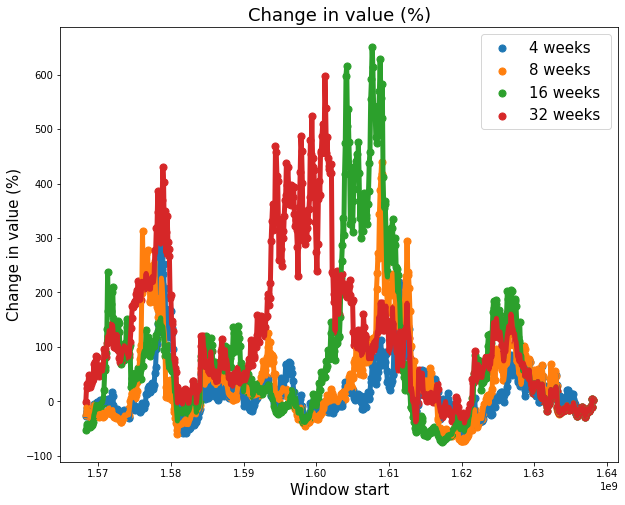

In [7]:
result.plot_results((measure := 'Change in value (%)'), legend_override=[f"{x} weeks " for x in window_widths_weeks]);

As a PDF

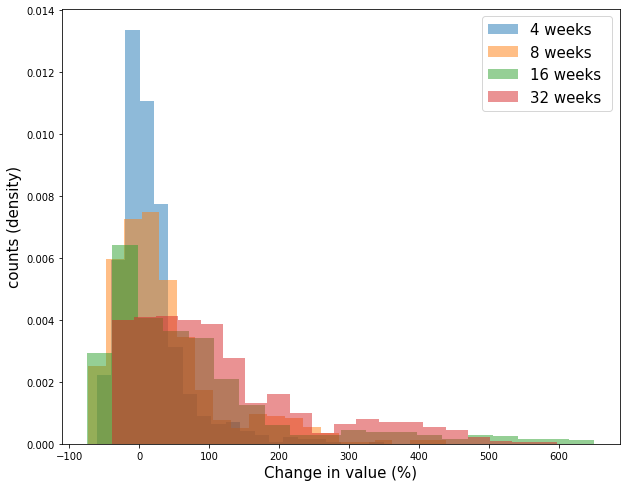

In [8]:
result.plot_pdfs(measure, density=True, bins=20, legend_override=[f"{x} weeks " for x in window_widths_weeks]);

As a CDF

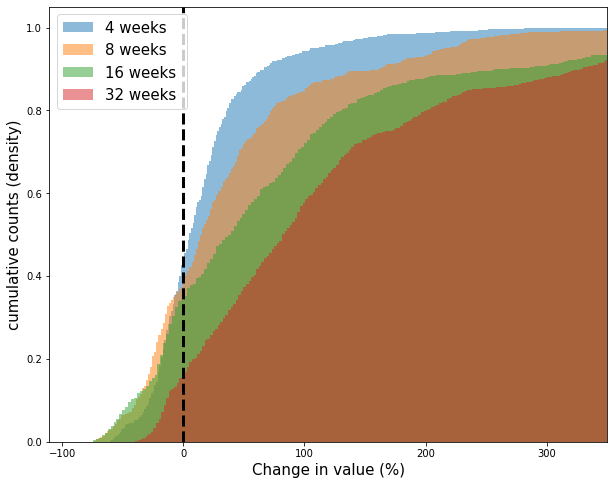

In [9]:
result.plot_pdfs(measure, density=True, cumulative=True, bins=300,
                 legend_override=[f"{x} weeks " for x in window_widths_weeks]);
plt.xlim([plt.xlim()[0], max(result.data[result.data['window_width'] == window_widths_weeks[0] * 7 * 24 * 60 * 60][measure])])
plt.axvline(x=0, color='k', linestyle='--', linewidth=3);